<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_09_Notebook_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Introdução à API Gemini do Google**
---



In [ ]:
#@title Instalando a biblioteca da API Gemini
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 18.7 MB/s eta 0:00:00


In [ ]:
#@title Versão da API Gemini

import google.generativeai as genai

print(genai.__version__)

0.7.2


In [ ]:
#@title Definindo a chave da API

from getpass import getpass

GOOGLE_API_KEY = getpass()

··········


In [ ]:
#@title Teste

import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel("gemini-1.5-flash")

resposta = modelo.generate_content("Qual a capital do Brasil?")

resposta.text

'A capital do Brasil é **Brasília**. 🇧🇷\n'

### **Geração de Texto**

A maneira mais simples de gerar texto usando a API Gemini é fornecer ao modelo uma única entrada somente de texto, como mostrado neste exemplo:

In [ ]:
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel("gemini-1.5-flash")

resposta = modelo.generate_content("Escreva uma história sobre uma mochila mágica")

resposta.text

'No coração de uma cidade agitada, onde arranha-céus se erguiam até o céu e o estrondo do tráfego ecoava incessantemente, vivia uma jovem chamada Anya. Anya era uma alma aventureira, com um desejo insaciável de explorar o mundo, mas suas circunstâncias a mantinham presa à rotina monótona da vida na cidade. Ela sonhava com terras distantes, florestas antigas e cidades vibrantes, mas seus sonhos pareciam inatingíveis.\n\nUm dia, enquanto vasculhava um brechó lotado, Anya encontrou uma mochila velha e desbotada, escondida no fundo de uma pilha de roupas esquecidas. Ela tinha um ar misterioso, com fivelas enferrujadas e um tecido desbotado, e Anya sentiu um estranho puxão para ela. Sem hesitar, ela a comprou, a mochila parecia estar esperando por ela.\n\nDe volta ao seu pequeno apartamento, Anya abriu a mochila para examinar melhor. Para seu espanto, ela descobriu um pequeno pedaço de papel velho dentro de um bolso secreto. Estava escrito com uma caligrafia empoeirada: "Para aqueles que bu

Nesse caso, o comando `("Escreva uma história sobre uma mochila mágica")` não inclui exemplos de saída, instruções do sistema ou informações de formatação. É uma abordagem **`zero-shot`**. Em alguns casos de uso, um comando **`one-shot`** ou **`few-shot`** pode produzir um resultado mais alinhado às expectativas do usuário.

**Zero-shot**: esses prompts não contêm exemplos para o modelo replicar. Os comandos `zero-shot` mostram essencialmente a capacidade do modelo de concluir o comando sem outros exemplos ou informações. Significa que o modelo precisa do conhecimento pré-existente para gerar uma resposta plausível.

**One-shot**: esses prompts fornecem ao modelo um único exemplo para replicar e continuar o padrão. Isso permite a geração de respostas previsíveis do modelo.

**few-shot**: esses comandos fornecem ao modelo vários exemplos para replicar. Use comandos `few-shot` para concluir tarefas complicadas, como sintetizar dados com base em um padrão.

A API Gemini oferece suporte a entradas multimodais que combinam texto com arquivos de mídia. O exemplo abaixo mostra como gerar texto com base em uma entrada de texto e imagem:

In [ ]:
import requests
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel('gemini-1.5-flash')

url_imagem1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg'
url_imagem2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg'

resposta1 = requests.get(url_imagem1)
resposta2 = requests.get(url_imagem2)

imagem1 = {
   'mime_type': 'image/jpeg',
   'data': resposta1.content
}

imagem2 = {
   'mime_type': 'image/jpeg',
   'data': resposta2.content
}

prompt = "What's different between these pictures? Answer in Portuguese."

resposta = modelo.generate_content([prompt, imagem1, imagem2])
resposta.text

'As imagens são idênticas. Não há diferença entre elas.'

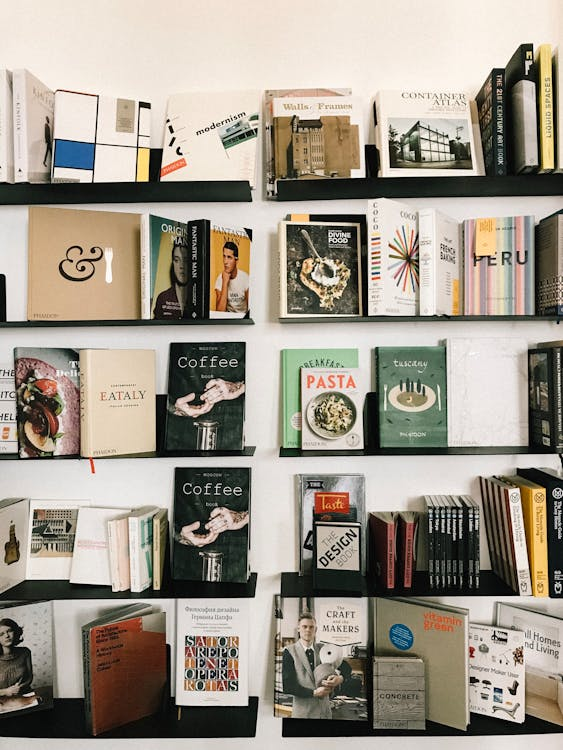

In [ ]:
import requests
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel('gemini-1.5-pro-latest')

url_imagem = 'https://images.datacamp.com/image/upload/v1716903926/image_fe2e16e40d.png'

resposta_imagem = requests.get(url_imagem)

In [ ]:
prompt = "List all the books and help me organize them into three categories."

imagem = {
   'mime_type': 'image/png',
   'data': resposta_imagem.content
}

resposta = modelo.generate_content([prompt, imagem])

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

##  Bookshelf Categories:

Here's a possible categorization of the books based on visible titles and covers:

**1. Art & Design:**

* **Top Shelf:**
    *  "Bauhaus" 
    *  (Unidentified book with black and white squares)
    *  "modernism"
    *  "Walls + Frames"
    *  "CONTAINER ATLAS" 
    *  (Unidentified architecture book)
* **Middle Shelf:** 
    * "Coffee" (with hands holding a coffee maker)
    *  "Taste: The Design Book"
    * (Series of thin black books)
* **Bottom Shelf:**
    * "Bauhaus" (small format)
    * "Операционные системы" (likely about operating systems)
    * "The Craft Makers"
    * "Concrete"
    * "Vitamin Green"
    * (Book about Design and User experience)


**2. Food & Drink:**

* **Top Shelf:**
    * "Divine Food"
    * "Coco"
    * "French Baking"
* **Middle Shelf:**
    * (Cookbook with green cover)
    * "EATALY"
    *  "Coffee" (with hands holding a coffee cup)
    * "Breakfast"
    *  "Pasta"
    * "tuscany"

**3. Travel & Culture:**

* **Top Shelf:**
    * "Original Man"
    * "Fantastic Man"
    * "Peru"
    * "The 21st Century Art Book"
    * "Liquid Space"
* **Middle Shelf:** 
    * (Travel book with red cover)
* **Bottom Shelf:**
    * (Book with woman in a headscarf)
    * "Mill Homes and Living" 
    
**Note:**  This categorization is based on limited information. Some books might fit into multiple categories, and the content of some books is impossible to determine from the image alone. 


### **Visão**

A API Gemini pode executar inferência em imagens e vídeos transmitidos a ela. Ao transmitir uma imagem, uma série de imagens ou um vídeo, o Gemini pode:

   * Descrever ou responder a perguntas sobre o conteúdo
   * Resumir o conteúdo
   * Extrapolar o conteúdo

As imagens precisam estar em um dos seguintes tipos `MIME` de dados de imagens:

    PNG - image/png
    JPEG - image/jpeg
    WEBP: image/webp
    HEIC – image/heic
    HEIF: image/heif


In [ ]:
import requests
import google.generativeai as genai
from IPython.display import Markdown

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel('gemini-1.5-pro')

url_imagem1 = 'https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg'
url_imagem2 = 'https://storage.googleapis.com/generativeai-downloads/images/piranha.jpg'
url_imagem3 = 'https://storage.googleapis.com/generativeai-downloads/images/firefighter.jpg'

resposta1 = requests.get(url_imagem1)
resposta2 = requests.get(url_imagem2)
resposta3 = requests.get(url_imagem3)

imagem1 = {
   'mime_type': 'image/jpeg',
   'data': resposta1.content
}

imagem2 = {
   'mime_type': 'image/jpeg',
   'data': resposta2.content
}

imagem3 = {
   'mime_type': 'image/jpeg',
   'data': resposta3.content
}

prompt = "Write an advertising jingle showing how the product in the first image could solve the problems shown in the second two images. Answer in Portuguese."

resposta = modelo.generate_content([prompt, imagem1, imagem2, imagem3])
Markdown(">" + resposta.text)

>(Música animada de aventura começa)

**Preso num beco sem saída? Gato na árvore, sem ter pra onde ir?**
**Com a Mochila Foguete, você vai voar, é só sorrir!**

**Tubarões no caminho, não te farão mais sofrer,**
**Ative os propulsores e deixe o vento te levar até o seu querer!**

**Com design discreto, ninguém vai desconfiar,**
**Que dentro dessa mochila, um foguete vai te levar pra qualquer lugar!**

**Mochila Foguete, a solução ideal,**
**Para alcançar o inalcançável, voando no seu quintal!**

(Música aumenta e termina com o som de um foguete decolando)


**Vídeo**

O Gemini 1.5 Pro e o Flash aceitam até aproximadamente uma hora de dados de vídeo.

O vídeo precisa estar em um dos seguintes formatos de vídeo de tipos `MIME`:

    video/mp4
    video/mpeg
    video/mov
    video/avi
    video/x-flv
    video/mpg
    video/webm
    video/wmv
    video/3gpp


Comece recuperando o vídeo curto:

In [ ]:
# curta-metragem da NASA "Júpiter's Great Red Spot Shrinks and Grows"

!wget https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4

--2024-07-20 21:11:00--  https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238090979 (227M) [video/mp4]
Saving to: ‘GreatRedSpot.mp4’

GreatRedSpot.mp4    100%[===================>] 227.06M   134MB/s    in 1.7s    

2024-07-20 21:11:02 (134 MB/s) - ‘GreatRedSpot.mp4’ saved [238090979/238090979]



Faça upload do vídeo usando a API File e imprima o URI.

In [ ]:
# upload the video and print a confirmation
video_file_name = "GreatRedSpot.mp4"

print(f"Uploading file...")
video_file = genai.upload_file(path = video_file_name)
print(f"Completed upload: {video_file.uri}")

Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/g3az90nj0e9u


Verifique se a API recebeu os arquivos chamando o método `files.get`.

**Observação**: os arquivos de vídeo têm um campo `State` na API `File`. Quando um vídeo é enviado, ele fica no estado `PROCESSING` até estar pronto para inferência. Somente arquivos `ACTIVE` podem ser usados para inferência de modelo.

In [ ]:
import time

while video_file.state.name == "PROCESSING":
    print('.', end='')
    time.sleep(10)
    video_file = genai.get_file(video_file.name)

print(video_file.state.name)

.ACTIVE


Quando o vídeo enviado estiver no estado `ACTIVE`, você poderá fazer solicitações `GenerateContent` que especificam o `URI` da API `File` para esse vídeo. Selecione o modelo generativo e forneça o vídeo enviado e um comando de texto.

In [ ]:
prompt = "Summarize this video. Answer in Portuguese."

modelo = genai.GenerativeModel("gemini-1.5-pro")

resposta = modelo.generate_content([video_file, prompt], request_options = {"timeout": 600})

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

O vídeo fala sobre a Grande Mancha Vermelha, uma tempestade gigante em Júpiter. A mancha tem encolhido e ficado mais redonda ao longo do tempo. Os cientistas esperavam que a velocidade do vento aumentasse conforme a tempestade encolhesse, mas isso não aconteceu. Na verdade, a Grande Mancha Vermelha está ficando mais alta. Essas descobertas foram feitas usando dados de várias missões da NASA, incluindo Voyager, Hubble e, mais recentemente, Juno. Os cientistas esperam desvendar mais segredos da Grande Mancha Vermelha através de novas investigações.

**Consultar as marcações de tempo no conteúdo**

Use carimbos de data/hora no formato `MM:SS` para se referir a momentos específicos no vídeo.

In [ ]:
prompt = "What are the examples given at 01:05 and 01:19 supposed to show us? Answer in Portuguese."

modelo = genai.GenerativeModel(model_name="gemini-1.5-pro")

resposta = modelo.generate_content([prompt, video_file],
                                  request_options = {"timeout": 600})

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

O exemplo da patinadora no gelo em 01:05 pretende ilustrar a ideia original dos cientistas, que acreditavam que a velocidade dos ventos dentro da Grande Mancha Vermelha aumentaria conforme a tempestade diminuísse de tamanho. Ou seja, à medida que a área da tempestade diminui, os ventos se concentrariam, levando a um aumento da velocidade, assim como uma patinadora gira mais rápido quando aproxima os braços do corpo.

Já o exemplo da cerâmica em 01:19 mostra a nova descoberta dos cientistas: a Grande Mancha Vermelha não está girando mais rápido, mas sim está crescendo em altura. Assim como um oleiro molda o barro em um torno, fazendo-o crescer verticalmente, a tempestade está se tornando mais alta, em vez de mais rápida.


**Transcrever o vídeo e fornecer descrições visuais**

In [ ]:
prompt = "Transcribe the audio, giving timestamps. Also provide visual descriptions. Answer in Portuguese."

modelo = genai.GenerativeModel("gemini-1.5-pro")

resposta = modelo.generate_content([prompt, video_file],
                                  request_options = {"timeout": 600})

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

## Transcrição e Descrição do Áudio

**0:00-0:05** Júpiter, meio iluminado, em um fundo escuro com a Via Láctea e muitas estrelas.

"Júpiter é o maior e mais antigo planeta do nosso sistema solar."

**0:05-0:16** Júpiter visto de perto, com anéis finos. A metade direita é iluminada e a metade esquerda está escura.

"Sua história abrange 4,5 bilhões de anos."
"Esse gigante gasoso é feito dos mesmos elementos que uma estrela, mas não cresceu o suficiente para se inflamar."

**0:16-0:21** Rotação de Júpiter, agora totalmente iluminado.

"A aparência de Júpiter é resultado de seu interior turbulento de gases e líquidos, produzindo uma tapeçaria de faixas de nuvens coloridas, bem como a icônica Grande Mancha Vermelha."

**0:21-0:32** Zoom na Grande Mancha Vermelha, que se move em sentido horário.

**0:32-0:46** Zoom na Grande Mancha Vermelha, vista de um ângulo diferente, agora com uma lua de Júpiter passando por trás. 

"A Grande Mancha Vermelha é uma tempestade gigantesca."
"É um anticiclone, e sem massa de terra no planeta para desacelerá-la, a Grande Mancha Vermelha durou mais de um século."

**0:46-1:12** Júpiter com a Grande Mancha Vermelha visível. Uma série de imagens da Grande Mancha Vermelha é mostrada, com as datas de 1995, 2009 e 2015. Abaixo, uma patinadora gira no gelo em preto e branco.

"Mas os cientistas que estudam a mancha notaram que ela está mudando com o tempo."
"A cor está se aprofundando e está, na verdade, encolhendo e ficando mais redonda."
"Aqueles que a estudam esperavam, portanto, ver as velocidades do vento dentro da Grande Mancha Vermelha aumentando à medida que a tempestade encolhe, como uma patinadora de gelo que gira mais rápido ao aproximar os braços do corpo."
"Mas este não é o caso."

**1:12-1:24** Zoom na Grande Mancha Vermelha, vista de um ângulo diferente. A imagem é sobreposta por uma série de linhas, e ao lado é mostrado um oleiro moldando um vaso na roda. 

"Dados revelam que a tempestade não está girando mais rápido, está, na verdade, ficando mais alta."
"Você pode pensar nisso como trabalhar com cerâmica. À medida que o grande pedaço de argila gira, as forças internas o impulsionam para cima. Então, da nossa perspectiva, olhando para baixo nas nuvens, vemos a mancha ficando menor e mais redonda."

**1:24-1:37** Júpiter com a Grande Mancha Vermelha visível. Uma série de imagens da Grande Mancha Vermelha é mostrada, com as datas de 1995, 2009 e 2015. Depois, a Terra é sobreposta à Grande Mancha Vermelha, mostrando que é menor que a mancha na imagem de 1995. Finalmente, uma espaçonave Voyager é mostrada orbitando Júpiter.

"A Grande Mancha Vermelha costumava ser grande o suficiente para caber três Terras, agora é um pouco mais de uma."
"Essas descobertas foram feitas analisando dados de inúmeras missões da NASA, incluindo Voyager, Hubble e, mais recentemente, Juno."

**1:37-1:47** Uma espaçonave Juno é mostrada orbitando Júpiter.

**1:47-1:57** Júpiter, meio iluminado, em um fundo escuro com a Via Láctea e muitas estrelas. A Grande Mancha Vermelha aparece na metade direita do planeta. Zoom na Grande Mancha Vermelha.

"E por meio de mais investigações, os cientistas esperam desvendar mais segredos da misteriosa Grande Mancha Vermelha."

**1:57-2:06** Um satélite em órbita da Terra, com a Terra visível ao fundo. O logotipo da NASA Goddard Space Flight Center é exibido.

**Listar arquivos**

In [ ]:
# list all files
for file in genai.list_files():
    print(f"{file.display_name}, URI: {file.uri}")


GreatRedSpot.mp4, URI: https://generativelanguage.googleapis.com/v1beta/files/g3az90nj0e9u
GreatRedSpot.mp4, URI: https://generativelanguage.googleapis.com/v1beta/files/di4grwzbmepw


**Excluir arquivos**

Os arquivos enviados por upload usando a API `File` são excluídos automaticamente após dois dias. Também é possível excluí-los manualmente usando `files.delete()`.

In [ ]:
# delete file
genai.delete_file(video_file.name)
print(f'Deleted file {video_file.uri}')

Deleted file https://generativelanguage.googleapis.com/v1beta/files/g3az90nj0e9u


### **Áudio**

O Gemini pode responder a comandos sobre áudio. Por exemplo, o Gemini pode:

   * Descrever, resumir ou responder a perguntas sobre o conteúdo de áudio.
   * Fornecer uma transcrição do áudio.
   * Fornecer respostas ou uma transcrição sobre um segmento específico do áudio.


O Gemini oferece suporte aos seguintes tipos `MIME` de formato de áudio:

    WAV: áudio/wav
    MP3: áudio/mp3
    AIFF: áudio/aiff
    AAC: áudio/aac
    OGG Vorbis - áudio/ogg
    FLAC: áudio/flac


O Gemini impõe as seguintes regras sobre áudio. Algumas dessas regras são:

   * O Gemini representa cada segundo de áudio como 25 tokens. Por exemplo, um minuto de áudio é representado como 1.500 tokens.
   * O Gemini só pode inferir respostas à fala em inglês.

Primeiro, faça o download de um arquivo de áudio de um servidor remoto para um diretório local.

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3

--2024-07-21 11:29:25--  https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41762063 (40M) [audio/mpeg]
Saving to: ‘State_of_the_Union_Address_30_January_1961.mp3’

State_of_the_Union_ 100%[===================>]  39.83M  18.8MB/s    in 2.1s    

2024-07-21 11:29:28 (18.8 MB/s) - ‘State_of_the_Union_Address_30_January_1961.mp3’ saved [41762063/41762063]



Agora, faça upload desse arquivo de áudio:

In [ ]:
# upload
audio_file = genai.upload_file(path='/content/State_of_the_Union_Address_30_January_1961.mp3')

Depois de fazer o upload, você pode enviar um comando ao Gemini chamando o método `generateContent`.

In [ ]:
modelo = genai.GenerativeModel("gemini-1.5-flash")

prompt = "Summarize the speech. Answer in Portuguese."

resposta = modelo.generate_content([prompt, audio_file])

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

O discurso do presidente Kennedy foi um apelo à união nacional e ao trabalho duro para enfrentar os desafios que os Estados Unidos enfrentavam naquele momento. Ele falou sobre a necessidade de fortalecer a economia, melhorar a educação e saúde, e enfrentar as ameaças do comunismo. Kennedy enfatizou a importância da cooperação com os aliados e a necessidade de uma postura forte contra a União Soviética. Ele também pediu uma nova aliança com a América Latina para promover o desenvolvimento econômico e social. O discurso foi um chamado à ação, pedindo aos americanos que se unissem para superar os desafios do tempo. 

Em vez de fazer upload de um arquivo de áudio, é possível transmitir dados de áudio na mesma chamada que contém o comando.

In [ ]:
import requests

url = "https://storage.googleapis.com/generativeai-downloads/data/Apollo-11_Day-01-Highlights-10s.mp3"

prompt = "Please summarize the audio. Answer in Portuguese."

modelo = genai.GenerativeModel("gemini-1.5-flash")

resposta = modelo.generate_content([
    prompt,
    {
        "mime_type": "audio/mp3",
        "data": requests.get(url).content
    }
])

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

O áudio descreve um voo espacial. Um motor principal foi iniciado e o segundo motor principal está pronto para ser ligado. 

**Receber uma transcrição do arquivo de áudio**

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/data/Apollo-11_Day-01-Highlights-10s.mp3

--2024-07-21 11:33:32--  https://storage.googleapis.com/generativeai-downloads/data/Apollo-11_Day-01-Highlights-10s.mp3
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160749 (157K) [audio/mpeg]
Saving to: ‘Apollo-11_Day-01-Highlights-10s.mp3’

Apollo-11_Day-01-Hi 100%[===================>] 156.98K   406KB/s    in 0.4s    

2024-07-21 11:33:33 (406 KB/s) - ‘Apollo-11_Day-01-Highlights-10s.mp3’ saved [160749/160749]



In [ ]:
import google.generativeai as genai

modelo = genai.GenerativeModel("gemini-1.5-flash")

prompt = "Generate a transcript of the speech. Answer in Portuguese."

audio_file = genai.upload_file(path='/content/Apollo-11_Day-01-Highlights-10s.mp3')

resposta = modelo.generate_content([prompt, audio_file])

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

T-menos 10, 9, 8. Temos um objetivo para ignição principal. Temos ignição principal. 

Uma solicitação pode especificar carimbos de data/hora do formato `MM:SS` para se referir a seções específicas em um arquivo de áudio. Por exemplo, o comando a seguir solicita uma transcrição que:

   * Começa em 2 minutos e 30 segundos do início do arquivo.
   * Termina em 3 minutos e 29 segundos depois do início do arquivo.


In [ ]:
# create a prompt containing timestamps.
prompt = "Provide a transcript of the speech from 02:30 to 03:29."

**Contar tokens**

In [ ]:
modelo.count_tokens([audio_file])

total_tokens: 352

### **Execução de código**

O recurso de execução de código da API Gemini permite que o modelo gere e execute código Python e aprender iterativamente com os resultados até chegar a a saída final.

É possível ativar a execução de código no modelo, conforme mostrado aqui:

In [ ]:
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel(
    model_name = 'gemini-1.5-pro',
    tools = 'code_execution')

resposta = modelo.generate_content((
    'Qual é a soma dos primeiros 50 números primos? '
    'Gere e execute o código para o cálculo e certifique-se de obter todos os 50.'))

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

Pensamentos:
Para resolver isso, preciso de um código que:
1. Determine se um número é primo.
2. Gere números primos até que 50 sejam encontrados.
3. Calcule a soma desses 50 números primos.

Aqui está o código Python para fazer isso:


``` python
def is_prime(n):
  """Retorna True se n for um número primo, False caso contrário."""
  if n <= 1:
    return False
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True


primes = []
num = 2
while len(primes) < 50:
  if is_prime(num):
    primes.append(num)
  num += 1

print(f"Os primeiros 50 números primos são: {primes}")
print(f"A soma dos primeiros 50 números primos é: {sum(primes)}")

```
```
Os primeiros 50 números primos são: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
A soma dos primeiros 50 números primos é: 5117

```
A soma dos primeiros 50 números primos é 5117. O código acima gerou primeiro os primeiros 50 números primos verificando cada número sequencialmente para determinar se ele é primo e, em seguida, calculou sua soma. 


Como alternativa, você pode ativar a execução do código na chamada para `generate_content`:

In [ ]:
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel("gemini-1.5-pro")

resposta = modelo.generate_content((
    'Qual é a soma dos primeiros 10 números primos? '
    'Gere e execute o código para o cálculo e certifique-se de obter todos os 10.'),
    tools = 'code_execution')

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

Pensamentos:
Para resolver isso, eu preciso:
1. Gerar os primeiros 10 números primos.
2. Calcular a soma desses números primos.

Eu posso usar uma função para checar por números primos e um loop para gerar os primeiros 10.


``` python
def is_prime(n):
  """Retorna True se n é um número primo, False caso contrário."""
  if n <= 1:
    return False
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True


primes = []
n = 2
while len(primes) < 10:
  if is_prime(n):
    primes.append(n)
  n += 1

print(f'{primes=}')
sum_of_primes = sum(primes)
print(f'A soma dos primeiros 10 números primos é {sum_of_primes}')

```
```
primes=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
A soma dos primeiros 10 números primos é 129

```
Os primeiros 10 números primos são: 2, 3, 5, 7, 11, 13, 17, 19, 23 e 29.

A soma destes números é 129. 


Também é possível usar a execução de código como parte de um chat.

In [ ]:
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

modelo = genai.GenerativeModel(
    model_name = 'gemini-1.5-pro',
    tools = 'code_execution')

chat = modelo.start_chat()

resposta = chat.send_message((
    'Qual é a soma dos primeiros 5 números primos? '
    'Gere e execute o código para o cálculo e certifique-se de obter todos os 5.'))

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

Pensamentos:
1. Gere os primeiros 5 números primos.
2. Calcula a soma desses números primos.

Aqui está o código para calcular a soma dos primeiros 5 números primos:


``` python
def is_prime(n):
  """Retorna True se n for um número primo, False caso contrário."""
  if n <= 1:
    return False
  for i in range(2, int(n ** 0.5) + 1):
    if n % i == 0:
      return False
  return True


primos = []
n = 2
while len(primos) < 5:
  if is_prime(n):
    primos.append(n)
  n += 1

print(f'{primos=}')
print(f'A soma dos primeiros 5 números primos é {sum(primos)}')

```
```
primos=[2, 3, 5, 7, 11]
A soma dos primeiros 5 números primos é 28

```
Os primeiros 5 números primos são 2, 3, 5, 7 e 11 e a sua soma é 28.

### **Modo *JSON***

O Gemini gera texto não estruturado por padrão, mas alguns aplicativos exigem texto estruturado. Para esses casos de uso, é possível restringir o Gemini para responder com `JSON`, um formato de dados estruturados adequado para processamento automatizado.

**Fornecer um esquema no comando**

In [ ]:
import google.generativeai as genai

genai.configure(api_key = GOOGLE_API_KEY)

# gemini-1.5-flash ou gemini-1.5-pro
modelo = genai.GenerativeModel('gemini-1.5-flash',
                                generation_config = {"response_mime_type": "application/json"})

prompt = """
  Liste 5 receitas populares de cookies.
  Usando este esquema JSON:
    Receita = {"nome_receita": str}
  Retornar uma `lista[Receita].
  Responda em Português.`
  """

resposta = modelo.generate_content(prompt)

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

[{"nome_receita": "Cookies de Chocolate"}, {"nome_receita": "Cookies de Aveia"}, {"nome_receita": "Cookies de Gengibre"}, {"nome_receita": "Cookies de Amendoim"}, {"nome_receita": "Cookies de Nozes"}]


**Fornecer um esquema pela configuração do modelo**

In [ ]:
import google.generativeai as genai
import typing_extensions as typing

class Receita(typing.TypedDict):
  nome_receita: str

genai.configure(api_key = GOOGLE_API_KEY)

# gemini-1.5-pro
modelo = genai.GenerativeModel('gemini-1.5-pro',
                    generation_config = {"response_mime_type": "application/json",
                                         "response_schema": list[Receita]})

prompt = "Liste 5 receitas populares de cookies. Responda em Português."

resposta = modelo.generate_content(prompt)

In [ ]:
from IPython.display import Markdown

Markdown(resposta.text)

[{"nome_receita": "Cookies com gotas de chocolate"}, {"nome_receita": "Cookies de açúcar"}, {"nome_receita": "Cookies de aveia com passas"}, {"nome_receita": "Cookies de gengibre"}, {"nome_receita": "Cookies recheados com doce de leite"}] 

**Referências**:

> https://ai.google.dev/gemini-api/docs/text-generation?hl=pt-br&lang=python

> https://ai.google.dev/gemini-api/docs/vision?hl=pt-br&lang=python

> https://ai.google.dev/gemini-api/docs/audio?hl=pt-br&lang=python

> https://ai.google.dev/gemini-api/docs/code-execution?hl=pt-br&lang=python

> https://ai.google.dev/gemini-api/docs/json-mode?hl=pt-br&lang=python
